# Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

# Load and Inspect the Data

In [2]:
# Load the Excel file
file_path = "/content/drive/MyDrive/‪MLSC Data Science & Machine Learning Course - Batch 2 - Group 1‬‏/Graduation Project #2‏/E-commerce_data.xlsx"
sheets = pd.ExcelFile(file_path).sheet_names

In [3]:
# Load each sheet into a DataFrame
customers = pd.read_excel(file_path, sheet_name='customers')
genders = pd.read_excel(file_path, sheet_name='genders')
cities = pd.read_excel(file_path, sheet_name='cities')
transactions = pd.read_excel(file_path, sheet_name='transactions')
branches = pd.read_excel(file_path, sheet_name='branches')
merchants = pd.read_excel(file_path, sheet_name='merchants')

In [4]:
# Display the first few rows of each table
print("Customers Table:")
display(customers.head())

print("\nGenders Table:")
display(genders.head())

print("\nCities Table:")
display(cities.head())

print("\nTransactions Table:")
display(transactions.head())

print("\nBranches Table:")
display(branches.head())

print("\nMerchants Table:")
display(merchants.head())

Customers Table:


,customer_id,join_date,city_id,gender_id
0,1,2022-01-08,7,1
1,2,2023-05-02,20,2
2,3,2023-05-14,15,1
3,4,2022-11-25,11,2
4,5,2023-04-26,8,1



Genders Table:


,gender_id,gender_name
0,1,Male
1,2,Female



Cities Table:


,city_id,city_name
0,1,Cairo
1,2,Alexandria
2,3,Giza
3,4,Shubra El-Kheima
4,5,Port Said



Transactions Table:


,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6



Branches Table:


,branch_id,merchant_id
0,1,11
1,2,18
2,3,8
3,4,15
4,5,9



Merchants Table:


,merchant_id,merchant_name
0,1,Rivas Group
1,2,Peters-Acosta
2,3,"Duran, Perry and Stout"
3,4,Morton Ltd
4,5,Curtis-Fields


# Data Cleaning and Merging

In [5]:
# Check for missing values
print("Missing Values in Customers Table:")
print(customers.isnull().sum())

print("\nMissing Values in Genders Table:")
print(genders.isnull().sum())

print("\nMissing Values in Cities Table:")
print(cities.isnull().sum())

print("\nMissing Values in Transactions Table:")
print(transactions.isnull().sum())

print("\nMissing Values in Branches Table:")
print(branches.isnull().sum())

print("\nMissing Values in Merchants Table:")
print(merchants.isnull().sum())

Missing Values in Customers Table:
customer_id    0
join_date      0
city_id        0
gender_id      0
dtype: int64

Missing Values in Genders Table:
gender_id      0
gender_name    0
dtype: int64

Missing Values in Cities Table:
city_id      0
city_name    0
dtype: int64

Missing Values in Transactions Table:
transaction_id           0
customer_id              0
transaction_date         0
transaction_status       0
coupon_name              0
burn_date             2484
branch_id                0
dtype: int64

Missing Values in Branches Table:
branch_id      0
merchant_id    0
dtype: int64

Missing Values in Merchants Table:
merchant_id      0
merchant_name    0
dtype: int64


In [6]:
len(transactions['burn_date'])

5000

In [9]:
# Replace missing burn_date values with NaT
transactions['burn_date'] = transactions['burn_date'].fillna(pd.NaT)

# Verify the changes
print("Missing Values in Transactions Table After Handling:")
print(transactions.isnull().sum())

Missing Values in Transactions Table After Handling:
transaction_id           0
customer_id              0
transaction_date         0
transaction_status       0
coupon_name              0
burn_date             2484
branch_id                0
dtype: int64


In [11]:
# Create a new column for burn status
transactions['is_burned'] = transactions['burn_date'].notna().astype(int)

# Display the updated transactions table
print("Updated Transactions Table:")
transactions.head()

Updated Transactions Table:


,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,is_burned
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,0
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,1
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,0
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,0
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,1


Burn Rate: 50.32%


<ipython-input-12-b86266337f36>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=transactions, x='is_burned', palette='viridis')


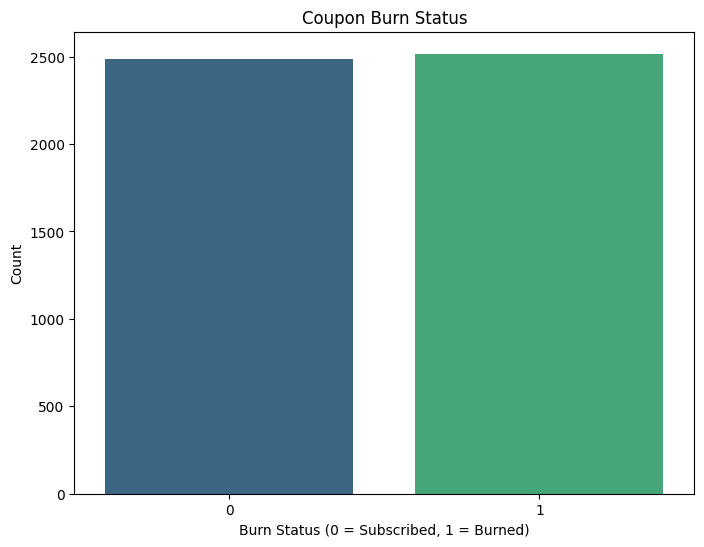

In [12]:
# Calculate burn rate
burn_rate = transactions['is_burned'].mean() * 100
print(f"Burn Rate: {burn_rate:.2f}%")

# Visualize burn status
plt.figure(figsize=(8, 6))
sns.countplot(data=transactions, x='is_burned', palette='viridis')
plt.title('Coupon Burn Status')
plt.xlabel('Burn Status (0 = Subscribed, 1 = Burned)')
plt.ylabel('Count')
plt.show()

In [13]:
# Merge customers with genders and cities
customer_demographics = pd.merge(customers, genders, on='gender_id')
customer_demographics = pd.merge(customer_demographics, cities, on='city_id')

# Display merged tables
print("Customer Demographics:")
display(customer_demographics.head())

Customer Demographics:


,customer_id,join_date,city_id,gender_id,gender_name,city_name
0,1,2022-01-08,7,1,Male,Mansoura
1,2,2023-05-02,20,2,Female,Sohag
2,3,2023-05-14,15,1,Male,Aswan
3,4,2022-11-25,11,2,Female,Ismailia
4,5,2023-04-26,8,1,Male,El-Mahalla El-Kubra


In [14]:
# Merge transactions with branches and merchants
transaction_details = pd.merge(transactions, branches, on='branch_id')
transaction_details = pd.merge(transaction_details, merchants, on='merchant_id')

# Display the merged transaction details
print("Merged Transaction Details:")
print(transaction_details.head())

Merged Transaction Details:
   transaction_id  customer_id transaction_date transaction_status  \
0               1          733       2024-05-11         subscribed   
1               2          631       2023-05-15             burned   
2               3          309       2022-11-13         subscribed   
3               4          695       2024-01-26         subscribed   
4               5          288       2022-10-12             burned   

  coupon_name  burn_date  branch_id  is_burned  merchant_id  \
0     uNY-568        NaT          7          0            7   
1     kBx-219 2023-06-04          5          1            9   
2     PLG-122        NaT          7          0            7   
3     Wzf-897        NaT          2          0           18   
4     qGb-428 2022-11-20          6          1           15   

                    merchant_name  
0                  Berry-Anderson  
1  Campbell, Shaffer and Martinez  
2                  Berry-Anderson  
3                       Lewi

# Feature Engineering

In [15]:
# Calculate customer lifetime (days since joining)
customer_demographics['join_date'] = pd.to_datetime(customer_demographics['join_date'])
customer_demographics['customer_lifetime'] = (datetime.now() - customer_demographics['join_date']).dt.days

In [16]:
# Calculate transaction frequency per customer
transaction_frequency = transaction_details.groupby('customer_id').size().reset_index(name='transaction_frequency')
customer_demographics = pd.merge(customer_demographics, transaction_frequency, on='customer_id', how='left')

In [17]:
# Calculate coupon usage (whether a customer has used coupons)
coupon_usage = transaction_details.groupby('customer_id')['coupon_name'].apply(lambda x: 1 if any(x.notna()) else 0).reset_index(name='coupon_usage')
customer_demographics = pd.merge(customer_demographics, coupon_usage, on='customer_id', how='left')

In [18]:
# Display updated customer demographics
print("Updated Customer Demographics:")
display(customer_demographics.head())

Updated Customer Demographics:


,customer_id,join_date,city_id,gender_id,gender_name,city_name,customer_lifetime,transaction_frequency,coupon_usage
0,1,2022-01-08,7,1,Male,Mansoura,1148,7.0,1.0
1,2,2023-05-02,20,2,Female,Sohag,669,3.0,1.0
2,3,2023-05-14,15,1,Male,Aswan,657,5.0,1.0
3,4,2022-11-25,11,2,Female,Ismailia,827,1.0,1.0
4,5,2023-04-26,8,1,Male,El-Mahalla El-Kubra,675,4.0,1.0


# Exploratory Data Analysis (EDA)

<ipython-input-19-5ec7d9e1c5a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_demographics, x='gender_name', palette='viridis')


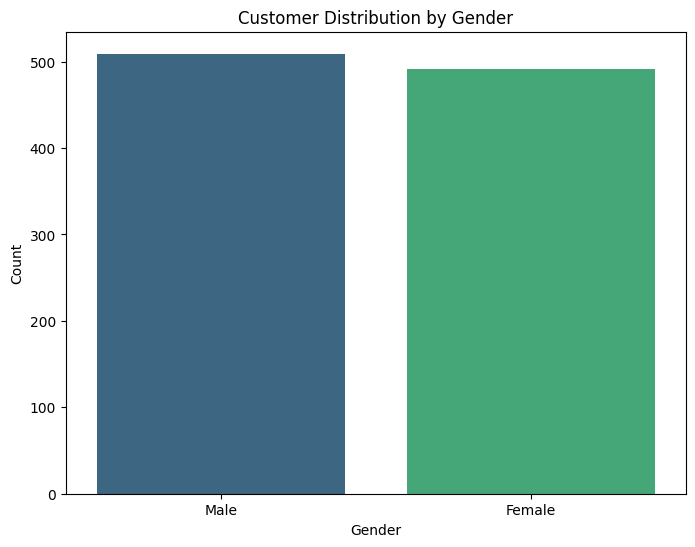

In [19]:
# Customer Demographics: Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_demographics, x='gender_name', palette='viridis')
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-20-cf00a26b717e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_demographics, x='city_name', palette='viridis')


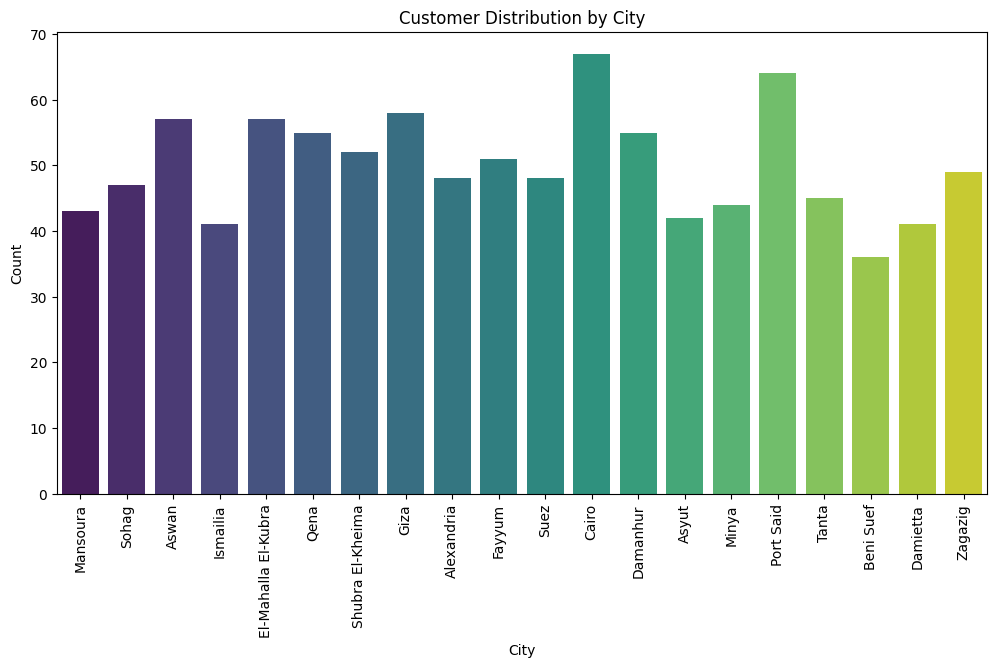

In [20]:
# Customer Demographics: City Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=customer_demographics, x='city_name', palette='viridis')
plt.title('Customer Distribution by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x600 with 0 Axes>

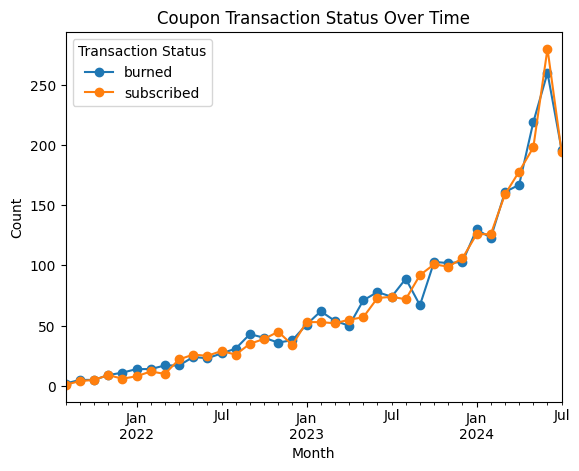

In [21]:
# Coupon Usage: Transaction Status Over Time
transaction_details['transaction_date'] = pd.to_datetime(transaction_details['transaction_date'])
transaction_details['month'] = transaction_details['transaction_date'].dt.to_period('M')
coupon_trends = transaction_details.groupby(['month', 'transaction_status']).size().unstack()

plt.figure(figsize=(12, 6))
coupon_trends.plot(kind='line', marker='o')
plt.title('Coupon Transaction Status Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Transaction Status')
plt.show()

# Customer Segmentation

In [22]:
# Prepare data for clustering
clustering_data = customer_demographics[['gender_name', 'city_name', 'transaction_frequency', 'coupon_usage']]

# Encode categorical variables
clustering_data = pd.get_dummies(clustering_data, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

In [23]:
# Check for missing values in the scaled data
print("Missing Values in Clustering Data:")
print(pd.DataFrame(clustering_data_scaled).isnull().sum())

Missing Values in Clustering Data:
0     11
1     11
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
dtype: int64


In [24]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
clustering_data_imputed = imputer.fit_transform(clustering_data)

# Scale the imputed data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data_imputed)

# Verify no missing values
print("Missing Values After Imputation:")
print(pd.DataFrame(clustering_data_scaled).isnull().sum())

Missing Values After Imputation:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
dtype: int64


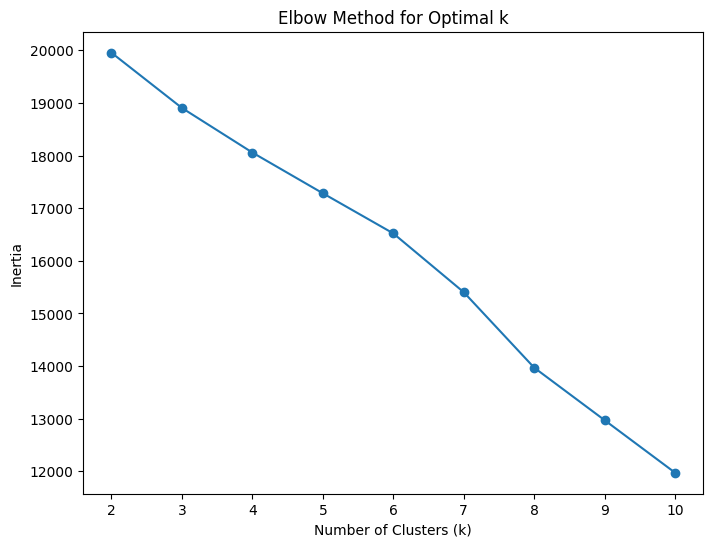

In [25]:
# Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [26]:
# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=4, random_state=42)
customer_demographics['cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Evaluate using Silhouette Score
silhouette_avg = silhouette_score(clustering_data_scaled, customer_demographics['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.11321118953221364


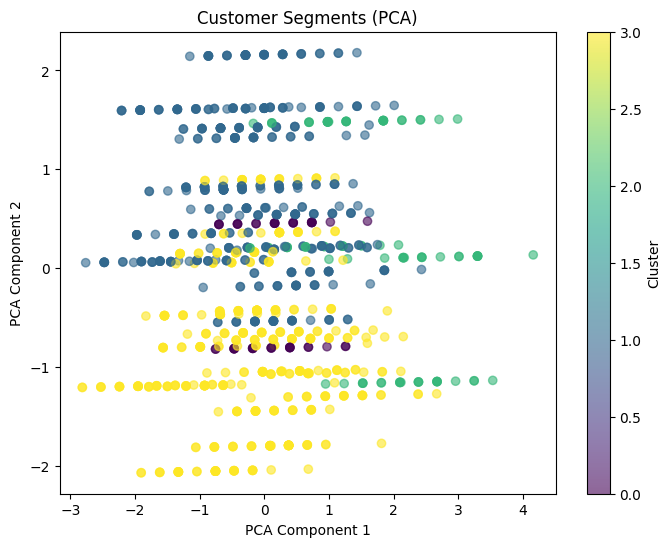

In [27]:
# PCA for Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=customer_demographics['cluster'], cmap='viridis', alpha=0.6)
plt.title('Customer Segments (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Export Dashboard and Code

In [28]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('dashboard.pdf') as pdf:
    # Add visualizations to PDF
    plt.figure(figsize=(8, 6))
    sns.countplot(data=customer_demographics, x='gender_name', palette='viridis')
    plt.title('Customer Distribution by Gender')
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(12, 6))
    sns.countplot(data=customer_demographics, x='city_name', palette='viridis')
    plt.title('Customer Distribution by City')
    plt.xticks(rotation=90)
    pdf.savefig()
    plt.close()

    # Add more visualizations as needed

<ipython-input-28-cdf847fb4024>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_demographics, x='gender_name', palette='viridis')
<ipython-input-28-cdf847fb4024>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_demographics, x='city_name', palette='viridis')


# Build the Dashboard

1. Customer Demographics

In [29]:
# Gender Distribution (Pie Chart)
gender_distribution = px.pie(customer_demographics, names='gender_name', title='Customer Distribution by Gender')

In [30]:
# City Distribution (Bar Chart)
city_counts = customer_demographics['city_name'].value_counts().reset_index()
city_counts.columns = ['city_name', 'count']  # Rename columns

city_distribution = px.bar(city_counts, x='city_name', y='count',
                           labels={'city_name': 'City', 'count': 'Count'},
                           title='Customer Distribution by City')
city_distribution.show()

2. Coupon Usage

In [31]:
# Merge transaction_details with customer_demographics to get city_name
transaction_details = pd.merge(transaction_details, customer_demographics[['customer_id', 'city_name']], on='customer_id', how='left')

# Verify the updated transaction_details table
print("Updated Transaction Details:")
display(transaction_details.head())

Updated Transaction Details:


,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,is_burned,merchant_id,merchant_name,month,city_name
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,0,7,Berry-Anderson,2024-05,Aswan
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,1,9,"Campbell, Shaffer and Martinez",2023-05,Damietta
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,0,7,Berry-Anderson,2022-11,Alexandria
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,0,18,Lewis LLC,2024-01,Aswan
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,1,15,Butler-Gomez,2022-10,Damietta


In [32]:
# Burn Rate by City (Bar Chart)
burn_rate_by_city = transaction_details.groupby('city_name')['is_burned'].mean().reset_index()
burn_rate_by_city = px.bar(burn_rate_by_city, x='city_name', y='is_burned',
                           title='Burn Rate by City', labels={'is_burned': 'Burn Rate'})
burn_rate_by_city.show()

In [46]:
# Group by month and transaction status
transaction_trends = transaction_details.groupby(['month', 'transaction_status']).size().unstack()

# Reset index and melt the DataFrame
transaction_trends = transaction_trends.reset_index().melt(id_vars='month', value_name='count')

# Convert 'month' from Period to string
transaction_trends['month'] = transaction_trends['month'].astype(str)

# Create the line chart
coupon_trends = px.line(transaction_trends, x='month', y='count', color='transaction_status',
                        title='Coupon Transaction Status Over Time')
coupon_trends.show()

3. Top-performing Cities/Branches


In [35]:
# Top 10 Cities by Transaction Volume (Bar Chart)
top_cities = transaction_details['city_name'].value_counts().nlargest(10).reset_index()
top_cities.columns = ['city_name', 'count']  # Rename columns

top_cities = px.bar(top_cities, x='city_name', y='count',
                    title='Top 10 Cities by Transaction Volume',
                    labels={'city_name': 'City', 'count': 'Transaction Count'})
top_cities.show()

In [44]:
# Top 10 Branches by Burn Rate (Bar Chart)
top_branches = transaction_details.groupby('branch_id')['is_burned'].mean().nlargest(10).reset_index()
top_branches = px.bar(top_branches, x='branch_id', y='is_burned',
                      title='Top 10 Branches by Burn Rate',
                      labels={'branch_id': 'Branch ID', 'is_burned': 'Burn Rate'})

top_branches.show()

4. Customer Segmentation


In [45]:
# Cluster Distribution (Pie Chart)
cluster_distribution = px.pie(customer_demographics, names='cluster', title='Customer Cluster Distribution')

# 2D Cluster Visualization (Scatter Plot)
cluster_scatter = px.scatter(pca_result, x=pca_result[:, 0], y=pca_result[:, 1],
                            color=customer_demographics['cluster'],
                            title='Customer Segments (PCA)',
                            labels={'0': 'PCA Component 1', '1': 'PCA Component 2'})


cluster_scatter.show()

# Combine Visualizations into a Dashboard

In [47]:
# Gender Distribution (Pie Chart)
gender_distribution = px.pie(customer_demographics, names='gender_name', title='Customer Distribution by Gender')

# City Distribution (Bar Chart)
city_counts = customer_demographics['city_name'].value_counts().reset_index()
city_counts.columns = ['city_name', 'count']  # Rename columns
city_distribution = px.bar(city_counts, x='city_name', y='count',
                           labels={'city_name': 'City', 'count': 'Count'},
                           title='Customer Distribution by City')

# Transaction Status Over Time (Line Chart)
transaction_trends = transaction_details.groupby(['month', 'transaction_status']).size().unstack()
transaction_trends = transaction_trends.reset_index().melt(id_vars='month', value_name='count')
transaction_trends['month'] = transaction_trends['month'].astype(str)  # Convert Period to string
coupon_trends = px.line(transaction_trends, x='month', y='count', color='transaction_status',
                        title='Coupon Transaction Status Over Time')

# Burn Rate by City (Bar Chart)
burn_rate_by_city = transaction_details.groupby('city_name')['is_burned'].mean().reset_index()
burn_rate_by_city = px.bar(burn_rate_by_city, x='city_name', y='is_burned',
                           title='Burn Rate by City', labels={'is_burned': 'Burn Rate'})

# Top 10 Cities by Transaction Volume (Bar Chart)
top_cities = transaction_details['city_name'].value_counts().nlargest(10).reset_index()
top_cities.columns = ['city_name', 'count']  # Rename columns
top_cities = px.bar(top_cities, x='city_name', y='count',
                    title='Top 10 Cities by Transaction Volume',
                    labels={'city_name': 'City', 'count': 'Transaction Count'})

# Top 10 Branches by Burn Rate (Bar Chart)
top_branches = transaction_details.groupby('branch_id')['is_burned'].mean().nlargest(10).reset_index()
top_branches = px.bar(top_branches, x='branch_id', y='is_burned',
                      title='Top 10 Branches by Burn Rate',
                      labels={'branch_id': 'Branch ID', 'is_burned': 'Burn Rate'})

# Cluster Distribution (Pie Chart)
cluster_distribution = px.pie(customer_demographics, names='cluster', title='Customer Cluster Distribution')

# 2D Cluster Visualization (Scatter Plot)
cluster_scatter = px.scatter(pca_result, x=pca_result[:, 0], y=pca_result[:, 1],
                            color=customer_demographics['cluster'],
                            title='Customer Segments (PCA)',
                            labels={'0': 'PCA Component 1', '1': 'PCA Component 2'})

# Create a subplot grid
fig = make_subplots(
    rows=3, cols=2,
    specs=[[{'type': 'pie'}, {'type': 'bar'}],
               [{'type': 'xy'}, {'type': 'bar'}],  # Use 'xy' for line chart
               [{'type': 'pie'}, {'type': 'scatter'}]],
    subplot_titles=('Gender Distribution', 'City Distribution',
                    'Coupon Transaction Trends', 'Burn Rate by City',
                    'Cluster Distribution', 'Customer Segments (PCA)')
)

# Add visualizations to the subplot grid
fig.add_trace(gender_distribution.data[0], row=1, col=1)
fig.add_trace(city_distribution.data[0], row=1, col=2)
fig.add_trace(coupon_trends.data[0], row=2, col=1)
fig.add_trace(burn_rate_by_city.data[0], row=2, col=2)
fig.add_trace(cluster_distribution.data[0], row=3, col=1)
fig.add_trace(cluster_scatter.data[0], row=3, col=2)

# Update layout
fig.update_layout(height=1200, width=1200, title_text="E-commerce Customer Segmentation Dashboard", showlegend=False)
fig.show()

# Export the Dashboard

In [48]:
# Export the dashboard as an HTML file
fig.write_html("ecommerce_dashboard.html")